<a href="https://colab.research.google.com/github/AisyahAmalia17/Portfolio-Mini-Project/blob/main/Loan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libarary

In [ ]:
! pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from numpy import where
from matplotlib import pyplot
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"aisee29","key":"208da1eb3be82907c2f3712857223751"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download yasserh/loan-default-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/loan-default-dataset
License(s): CC0-1.0
  0% 0.00/4.89M [00:00<?, ?B/s]
100% 4.89M/4.89M [00:00<00:00, 57.9MB/s]


In [ ]:
!unzip loan-default-dataset.zip

Archive:  loan-default-dataset.zip
  inflating: Loan_Default.csv        


# Data Understanding

In [ ]:
df = pd.read_csv('/content/Loan_Default.csv')
df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Features**

1. ID = Customer ID of Applicant
2. year = Year of Application
3. loan limit = maximum avaliable amount of the loan allowed to be taken
4. Gender = sex type
5. approv_in_adv = Is loan pre-approved or not
6. loan_type = Type of loan
7. loan_purpose = the reason you want to borrow money
8. Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
9. open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
10. business_or_commercial = Usage type of the loan amount
11. loan_amount = The exact loan amount
12. rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
13. Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
14. Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
15. term = the loan's repayment period
16. Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
17. interest_only = amount of interest only without principles
18. lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
19. property_value = the present worth of future benefits arising from the ownership of the property
20. construction_type = Collateral construction type
21. occupancy_type = classifications refer to categorizing structures based on their usage
22. Secured_by = Type of Collatoral
23. total_units = number of unites
24. income = refers to the amount of money, property, and other transfers of value received over a set period of time
25. credit_type = type of credit
26. co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
27. age = applicant's age
28. submission_of_application = Ensure the application is complete or not
29. LTV = life-time value (LTV) is a prognostication of the net profit
30. Region = applicant's place
31. Security_Type = Type of Collatoral
32. status = Loan status (Approved/Declined)
33. dtir1 = debt-to-income ratio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [ ]:
cat_df = df.drop(num_df, axis = 1)
cat_df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,lpsm,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


<ipython-input-80-a7a8c0cecddb>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)


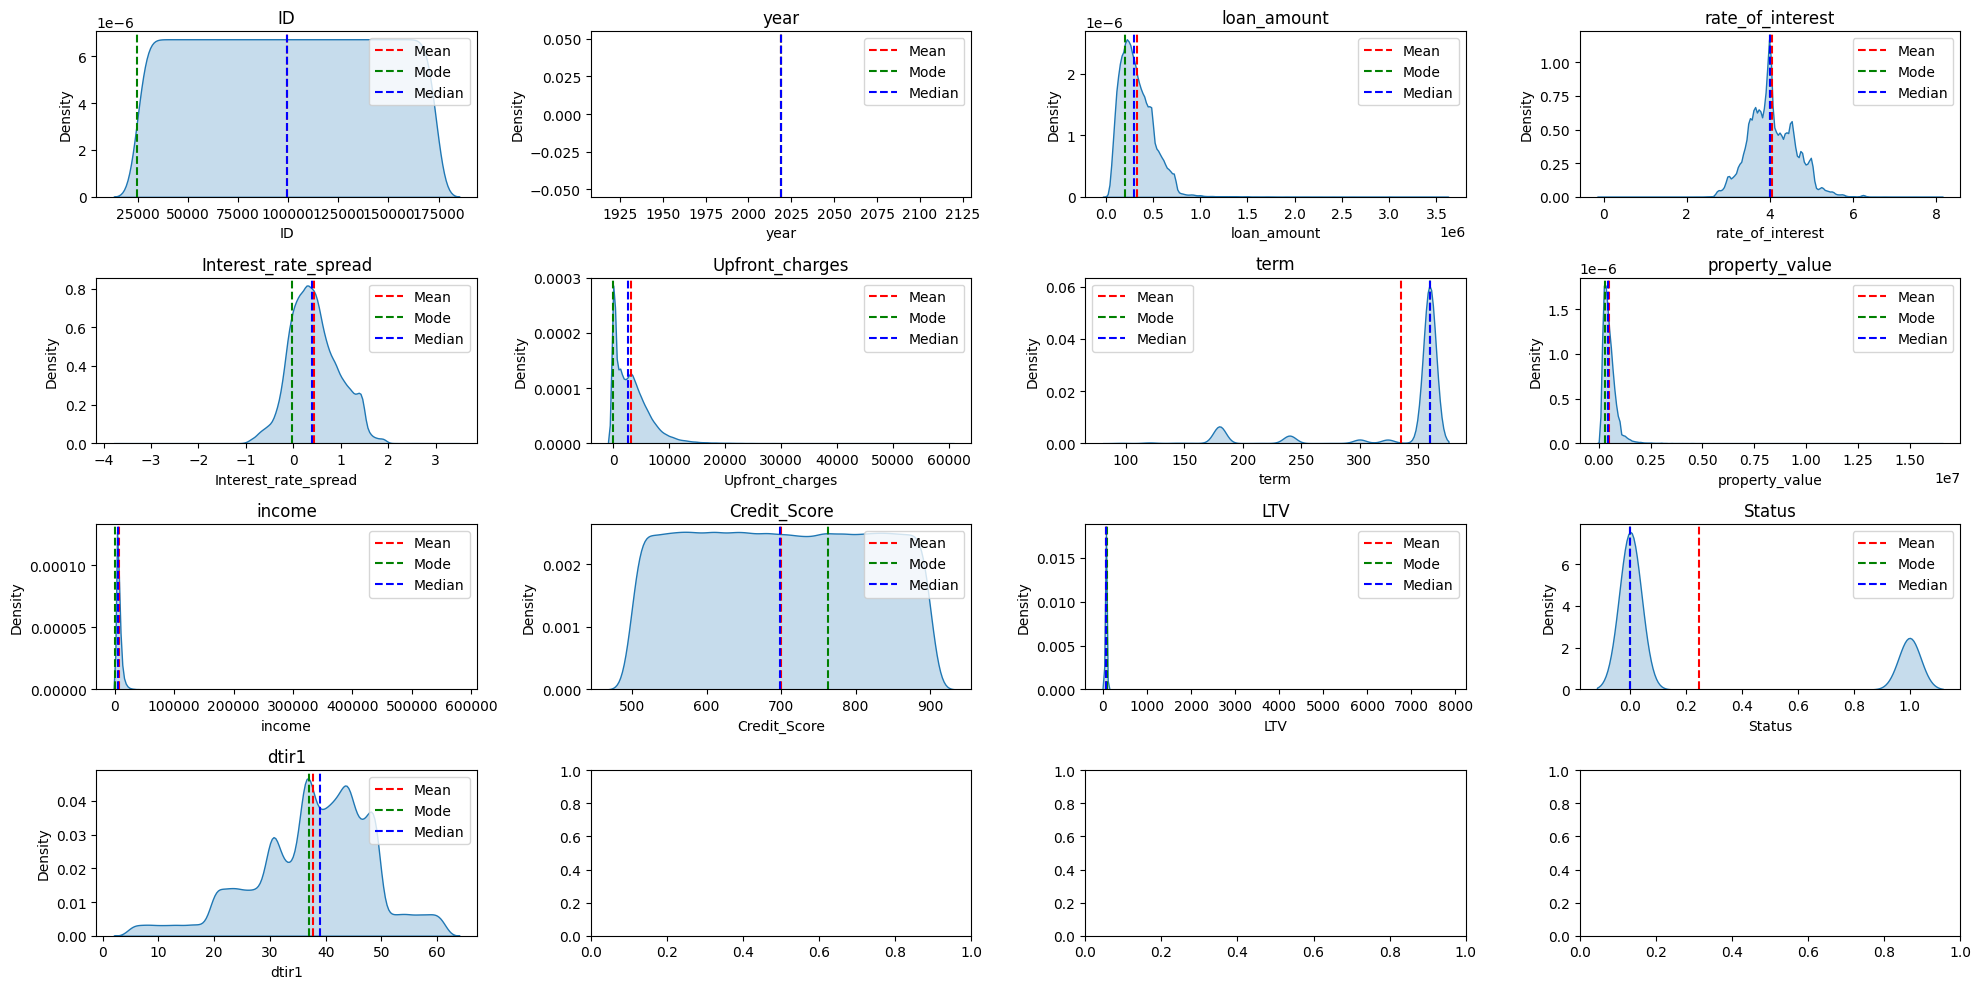

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10))

for i, attr in enumerate(num_df):
    row = i // 4
    col = i % 4
    sns.kdeplot(data=num_df[attr], ax=axes[row, col], fill=True)
    axes[row, col].set_title(attr)

    mean_val = num_df[attr].mean()
    mode_val = num_df[attr].mode().iloc[0]
    median_val = num_df[attr].median()

    axes[row, col].axvline(mean_val, color='r', linestyle='--', label='Mean')
    axes[row, col].axvline(mode_val, color='g', linestyle='--', label='Mode')
    axes[row, col].axvline(median_val, color='b', linestyle='--', label='Median')

    axes[row, col].legend()

plt.tight_layout()

plt.show()

The following describes the distribution of numerical data: Based on the data visualization results, the features ID and Credit_Score exhibit a normal distribution, the features Status and dtir display a bimodal distribution, and the remaining features tend to exhibit a skewed distribution.

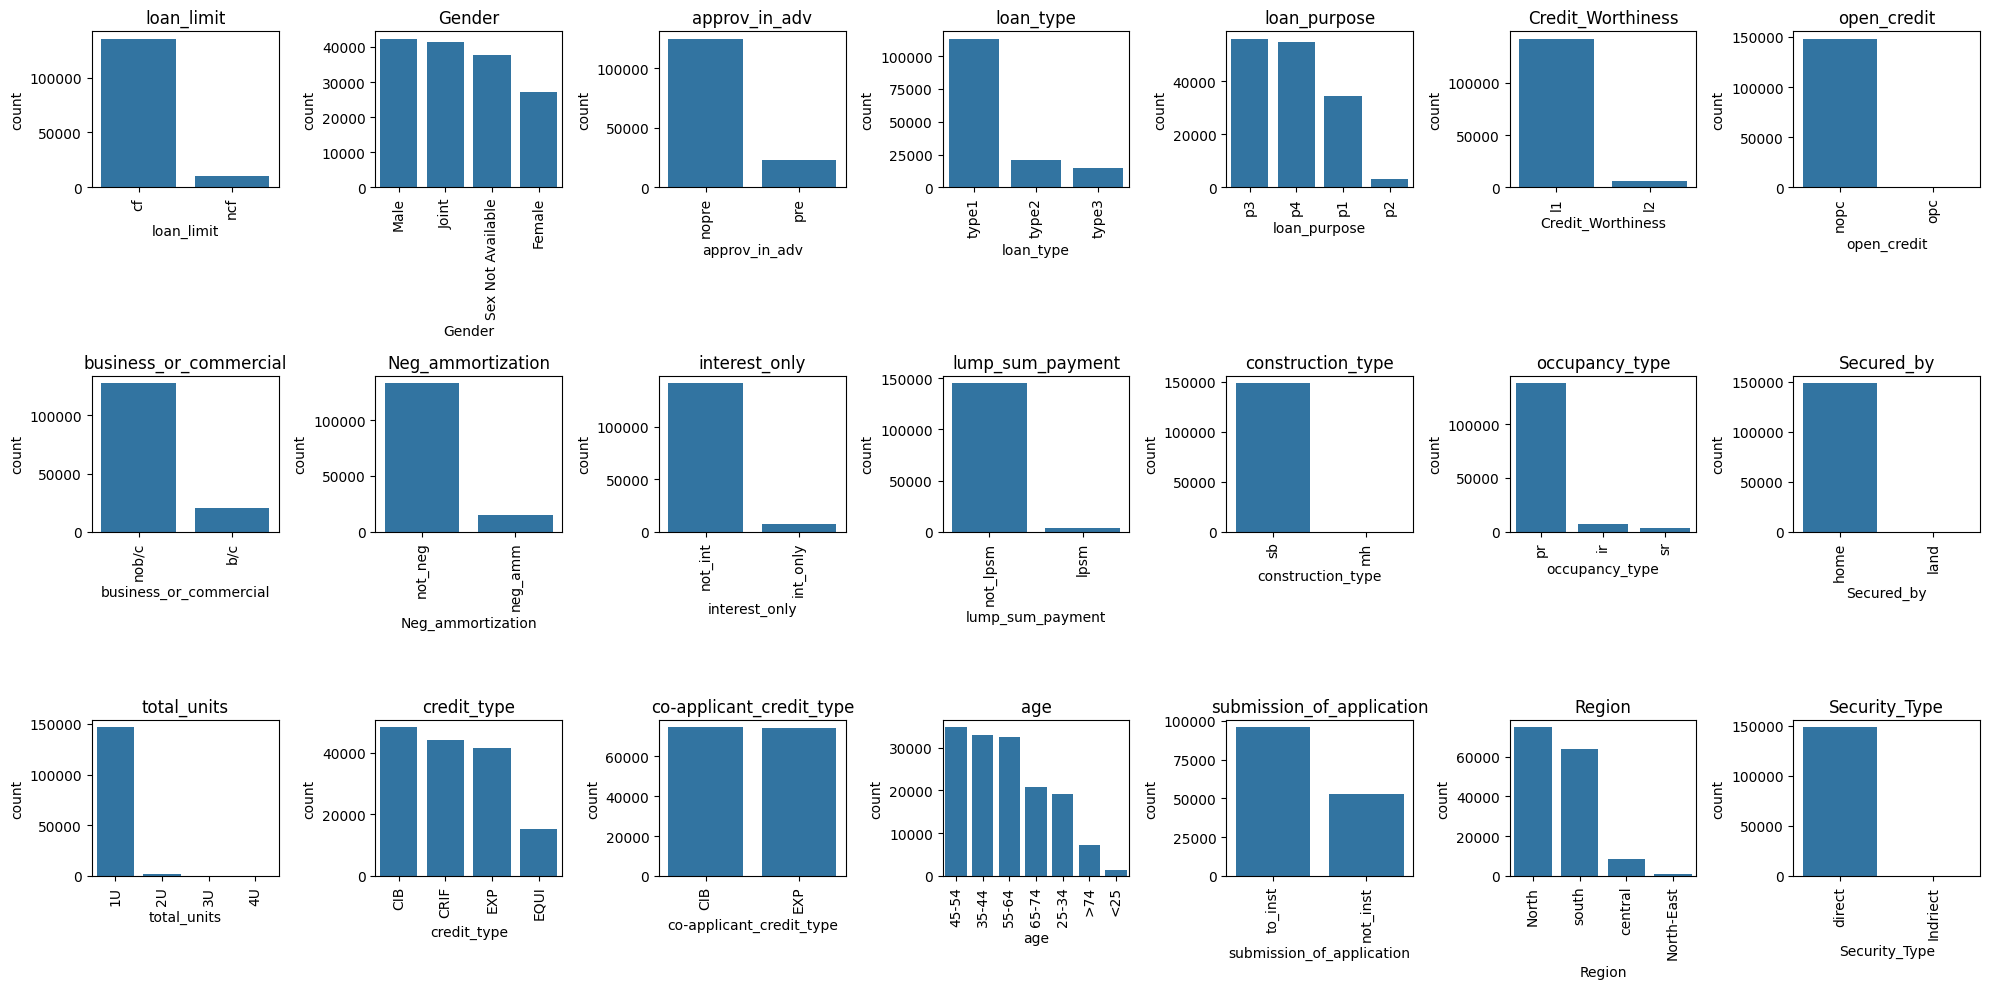

In [ ]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cat_df.columns):
    plt.subplot(3, 7, i+1)
    top_10_values = cat_df[column].value_counts().head(10)
    sns.countplot(data=cat_df, x=column, order=top_10_values.index)
    plt.title(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

Below is the visualization of categorical data distribution. On average, categorical data exhibit a skewed distribution.

Only the feature co-applicant-credit-type shows a normal distribution.

# Data Preparation

### Change column names to have the same writing

In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
col_ren = {'Gender': 'gender', 'Credit_Worthiness': 'credit_worthiness', 'Upfront_charges': 'upfront_charges',
           'Neg_ammortization': 'neg_ammortization', 'Secured_by': 'secured_by','Security_Type': 'security_type','Status': 'status',
           'Interest_rate_spread': 'interest_rate_spread', 'Credit_Score': 'credit_score', 'Region': 'region'}

df = df.rename(columns=col_ren)
df.columns

Index(['ID', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

### Check Duplikasi Data

In [ ]:
df.duplicated().sum()

0

### Check Value

In [ ]:
def check_values(df):
    data = []
    for col in df.columns:
        data.append([col, \
                  df[col].dtype, \
                  df[col].isna().sum(), \
                  round(100*(df[col].isna().sum()/len(df)), 2), \
                  df[col].nunique(), \
                  df[col].unique()
                  ])

    return pd.DataFrame(columns=['kolom', 'dataType', 'null', 'nullPercentage', 'unique', 'values'], data=data)

In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,ID,int64,0,0.00,148670,"[24890, 24891, 24892, 24893, 24894, 24895, 248..."
1,year,int64,0,0.00,1,[2019]
2,loan_limit,object,3344,2.25,2,"[cf, nan, ncf]"
3,gender,object,0,0.00,4,"[Sex Not Available, Male, Joint, Female]"
4,approv_in_adv,object,908,0.61,2,"[nopre, pre, nan]"
5,loan_type,object,0,0.00,3,"[type1, type2, type3]"
6,loan_purpose,object,134,0.09,4,"[p1, p4, p3, p2, nan]"
7,credit_worthiness,object,0,0.00,2,"[l1, l2]"
8,open_credit,object,0,0.00,2,"[nopc, opc]"
9,business_or_commercial,object,0,0.00,2,"[nob/c, b/c]"


### Cleaning Data Null

For data with a large number of null values, imputation was performed.




In [ ]:
def impute_median(df, columns):
    for column in columns:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
    return df

def impute_mode(df, columns):
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    return df

# List of columns for each type of imputation
median_imputation_columns = ['rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'income', 'LTV', 'dtir1']
mode_imputation_columns = ['loan_limit', 'approv_in_adv', 'loan_purpose', 'neg_ammortization', 'age', 'submission_of_application']

# Apply imputations
df = impute_median(df, median_imputation_columns)
df = impute_mode(df, mode_imputation_columns)


In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,ID,int64,0,0.0,148670,"[24890, 24891, 24892, 24893, 24894, 24895, 248..."
1,year,int64,0,0.0,1,[2019]
2,loan_limit,object,0,0.0,2,"[cf, ncf]"
3,gender,object,0,0.0,4,"[Sex Not Available, Male, Joint, Female]"
4,approv_in_adv,object,0,0.0,2,"[nopre, pre]"
5,loan_type,object,0,0.0,3,"[type1, type2, type3]"
6,loan_purpose,object,0,0.0,4,"[p1, p4, p3, p2]"
7,credit_worthiness,object,0,0.0,2,"[l1, l2]"
8,open_credit,object,0,0.0,2,"[nopc, opc]"
9,business_or_commercial,object,0,0.0,2,"[nob/c, b/c]"


### Outlier Handling

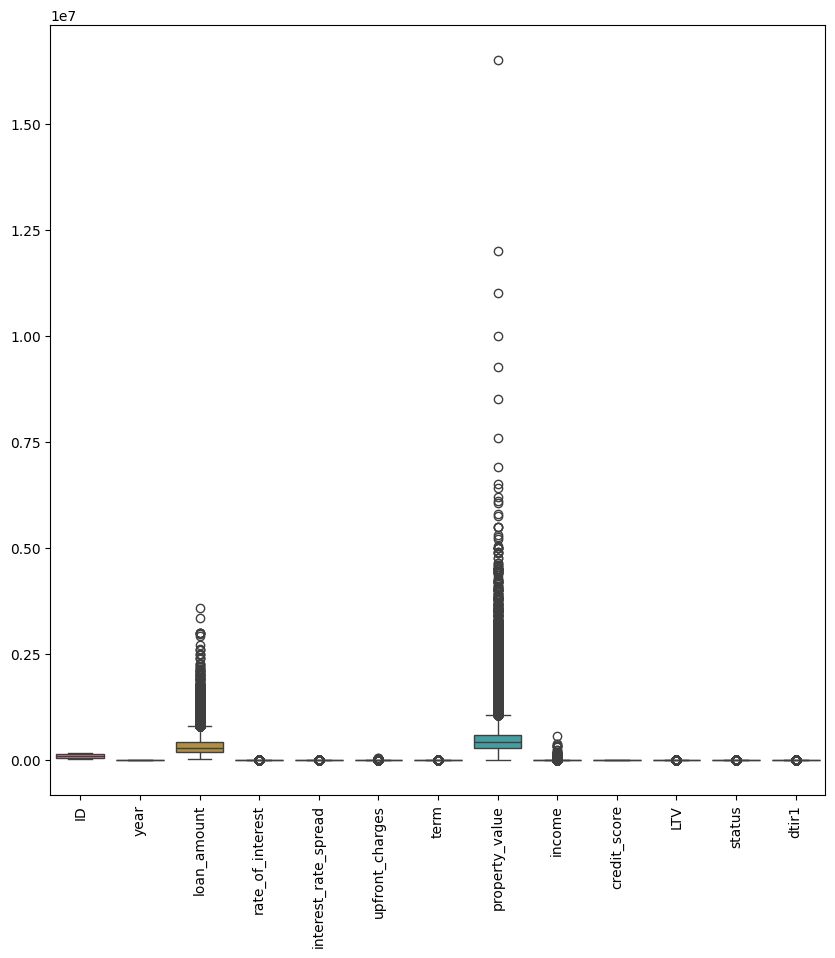

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Below are the results from the boxplot visualization, which shows outliers in the numerical features. Based on the visualization, outliers were detected in the features 'loan_amount,' 'upfront_charges,' 'property_value,' and 'income.'

In [ ]:
def detect_and_remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        med = np.median(df[feature])

        # Replace outliers with the median using np.where
        df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), med, df[feature])

    return df

df = detect_and_remove_outliers(df, features=['loan_amount', 'upfront_charges', 'property_value', 'income'])


In [ ]:
check_values(df)

,kolom,dataType,null,nullPercentage,unique,values
0,ID,int64,0,0.0,148670,"[24890, 24891, 24892, 24893, 24894, 24895, 248..."
1,year,int64,0,0.0,1,[2019]
2,loan_limit,object,0,0.0,2,"[cf, ncf]"
3,gender,object,0,0.0,4,"[Sex Not Available, Male, Joint, Female]"
4,approv_in_adv,object,0,0.0,2,"[nopre, pre]"
5,loan_type,object,0,0.0,3,"[type1, type2, type3]"
6,loan_purpose,object,0,0.0,4,"[p1, p4, p3, p2]"
7,credit_worthiness,object,0,0.0,2,"[l1, l2]"
8,open_credit,object,0,0.0,2,"[nopc, opc]"
9,business_or_commercial,object,0,0.0,2,"[nob/c, b/c]"


In [ ]:
df.shape

(148670, 34)

## Encoding Categorical Feature

In [ ]:
cat_col = []
for i in df.columns:
    if(df[i].dtype == "object"):
        cat_col.append(i)

print("Categorical Variables:\n",cat_col,"\n")

Categorical Variables:
 ['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'region', 'security_type'] 



In [ ]:
print(df[cat_col].nunique().sum)

<bound method Series.sum of loan_limit                   2
gender                       4
approv_in_adv                2
loan_type                    3
loan_purpose                 4
credit_worthiness            2
open_credit                  2
business_or_commercial       2
neg_ammortization            2
interest_only                2
lump_sum_payment             2
construction_type            2
occupancy_type               3
secured_by                   2
total_units                  4
credit_type                  4
co-applicant_credit_type     2
age                          7
submission_of_application    2
region                       4
security_type                2
dtype: int64>


In [ ]:
label = LabelEncoder()
for i in cat_col:
    df[i] = label.fit_transform(df[i])

In [ ]:
df

,ID,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,LTV,region,security_type,status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,116500.0,3.990,0.3904,2596.45,360.0,1,1,1,118000.0,1,1,0,0,1740.0,3,758,0,0,1,98.728814,3,1,1,45.0
1,24891,2019,0,2,0,1,0,0,0,0,206500.0,3.990,0.3904,2596.45,360.0,1,1,0,418000.0,1,1,0,0,4980.0,2,552,1,3,1,75.135870,0,1,1,39.0
2,24892,2019,0,2,1,0,0,0,0,1,406500.0,4.560,0.2000,595.00,360.0,0,1,1,508000.0,1,1,0,0,9480.0,3,834,0,1,1,80.019685,3,1,0,46.0
3,24893,2019,0,2,0,0,3,0,0,1,456500.0,4.250,0.6810,2596.45,360.0,1,1,1,658000.0,1,1,0,0,11880.0,3,587,0,2,0,69.376900,0,1,0,42.0
4,24894,2019,0,1,1,0,0,0,0,1,696500.0,4.000,0.3042,0.00,360.0,1,1,1,758000.0,1,1,0,0,10440.0,1,602,1,0,0,91.886544,0,1,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,0,3,0,0,2,0,0,1,436500.0,3.125,0.2571,2596.45,180.0,1,1,1,608000.0,1,1,0,0,7860.0,0,659,1,3,1,71.792763,3,1,0,48.0
148666,173556,2019,0,2,0,0,0,0,0,1,586500.0,5.190,0.8544,0.00,360.0,1,1,1,788000.0,1,0,0,3,7140.0,0,569,0,0,0,74.428934,3,1,0,15.0
148667,173557,2019,0,2,0,0,3,0,0,1,446500.0,3.125,0.0816,1226.64,180.0,1,1,1,728000.0,1,1,0,0,6900.0,0,702,1,2,0,61.332418,0,1,0,49.0
148668,173558,2019,0,0,0,0,3,0,0,1,196500.0,3.500,0.5824,4323.33,180.0,1,1,1,278000.0,1,1,0,0,7140.0,3,737,1,3,1,70.683453,0,1,0,29.0


In [ ]:
corr_matrix = df.corr()
corr_matrix['status'].sort_values(ascending = False)

,status
status,1.000000
co-applicant_credit_type,0.144239
submission_of_application,0.122410
credit_type,0.112760
dtir1,0.082432
loan_limit,0.053332
loan_type,0.052301
gender,0.051794
age,0.048807
region,0.047142


# Modelling

### Initialize the dependent and independent variables


In [ ]:
X = df.drop(['status','ID'], axis=1)
y = df['status']

In [ ]:
X

,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,LTV,region,security_type,dtir1
0,2019,0,3,0,0,0,0,0,1,116500.0,3.990,0.3904,2596.45,360.0,1,1,1,118000.0,1,1,0,0,1740.0,3,758,0,0,1,98.728814,3,1,45.0
1,2019,0,2,0,1,0,0,0,0,206500.0,3.990,0.3904,2596.45,360.0,1,1,0,418000.0,1,1,0,0,4980.0,2,552,1,3,1,75.135870,0,1,39.0
2,2019,0,2,1,0,0,0,0,1,406500.0,4.560,0.2000,595.00,360.0,0,1,1,508000.0,1,1,0,0,9480.0,3,834,0,1,1,80.019685,3,1,46.0
3,2019,0,2,0,0,3,0,0,1,456500.0,4.250,0.6810,2596.45,360.0,1,1,1,658000.0,1,1,0,0,11880.0,3,587,0,2,0,69.376900,0,1,42.0
4,2019,0,1,1,0,0,0,0,1,696500.0,4.000,0.3042,0.00,360.0,1,1,1,758000.0,1,1,0,0,10440.0,1,602,1,0,0,91.886544,0,1,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,2019,0,3,0,0,2,0,0,1,436500.0,3.125,0.2571,2596.45,180.0,1,1,1,608000.0,1,1,0,0,7860.0,0,659,1,3,1,71.792763,3,1,48.0
148666,2019,0,2,0,0,0,0,0,1,586500.0,5.190,0.8544,0.00,360.0,1,1,1,788000.0,1,0,0,3,7140.0,0,569,0,0,0,74.428934,3,1,15.0
148667,2019,0,2,0,0,3,0,0,1,446500.0,3.125,0.0816,1226.64,180.0,1,1,1,728000.0,1,1,0,0,6900.0,0,702,1,2,0,61.332418,0,1,49.0
148668,2019,0,0,0,0,3,0,0,1,196500.0,3.500,0.5824,4323.33,180.0,1,1,1,278000.0,1,1,0,0,7140.0,3,737,1,3,1,70.683453,0,1,29.0


In [ ]:
y

,status
0,1
1,1
2,0
3,0
4,0
...,...
148665,0
148666,0
148667,0
148668,0


###Detect imbalance data

In [ ]:
from collections import Counter

counter_y = Counter(y)
print(counter_y)

Counter({0: 112031, 1: 36639})


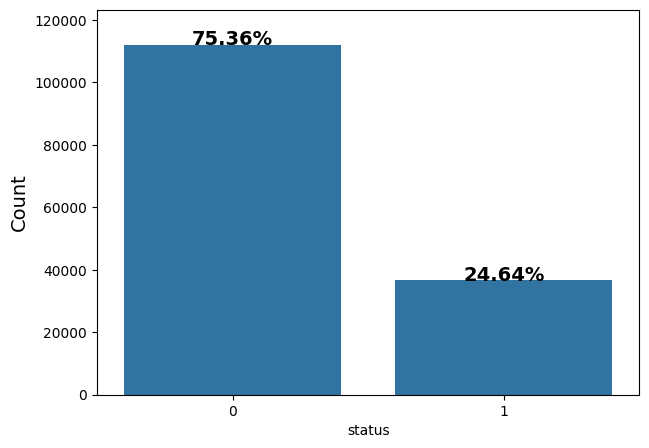

In [ ]:
total = len(df)
plt.figure(figsize=(7,5))
g = sns.countplot(x='status', data=df)
g.set_ylabel('Count', fontsize=14)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 1.5,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.show()

oversampling by SMOTE

In [ ]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({1: 112031, 0: 112031})


###Splitting Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Training Model

In [ ]:
classifiers = {
    'LogisiticRegression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'NB,': GaussianNB(),
    'GBC': GradientBoostingClassifier(),
    'RF' : RandomForestClassifier(),
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "=", training_score.mean() * 100, "% accuracy score")

LogisticRegression = 75.32706665072168 % accuracy score
KNeighborsClassifier = 85.65194878154969 % accuracy score
DecisionTreeClassifier = 99.99495526299071 % accuracy score
GaussianNB = 87.32932148667189 % accuracy score
GradientBoostingClassifier = 99.9907512860285 % accuracy score
RandomForestClassifier = 99.99831840921513 % accuracy score



> **Best Model = DecisionTreeClassifier**




In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9999663684670748

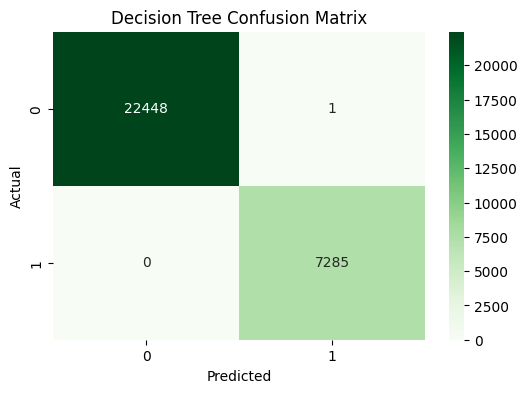

In [ ]:
DT_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



## Parameter Search

In [ ]:
params = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini', 'entropy', 'log_loss']
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameter terbaik: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}


In [ ]:
x = grid_search.cv_results_

for mean_score, params in zip(x["mean_test_score"], x["params"]):
    print(np.sqrt(mean_score), params)

0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.999945346982742 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.999945346982742 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 10}
0.9999579595234038 {'criterion'

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9998991054012242

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



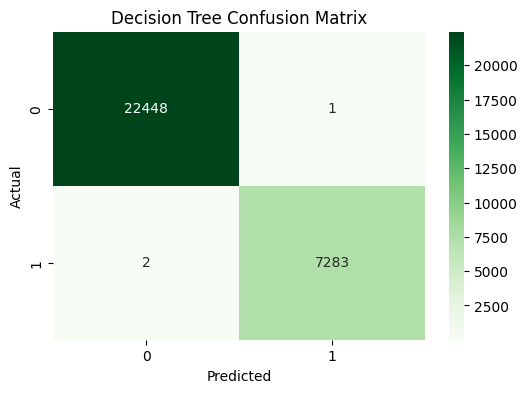

In [ ]:
DT_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Selection With RFE (OPTIONAL)

In [ ]:
model = DecisionTreeClassifier()

rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [ ]:
print('Chosen best 10 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['rate_of_interest', 'interest_rate_spread', 'upfront_charges',
       'neg_ammortization', 'credit_type', 'age', 'submission_of_application',
       'LTV', 'region', 'security_type'],
      dtype='object')


### Training with the selected features

In [ ]:
X_train_features = X_train[X.columns[rfe.support_]]
X_test_features = X_test[X.columns[rfe.support_]]

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(X_train_features, y_train)

print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Parameter terbaik: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}


In [ ]:
x = grid_search.cv_results_

for mean_score, params in zip(x["mean_test_score"], x["params"]):
    print(np.sqrt(mean_score), params)

0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.999945346982742 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.999945346982742 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.9999579595234038 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.9999579595234038 {'criterion'

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test_features)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9999663684670748

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22449
           1       1.00      1.00      1.00      7285

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



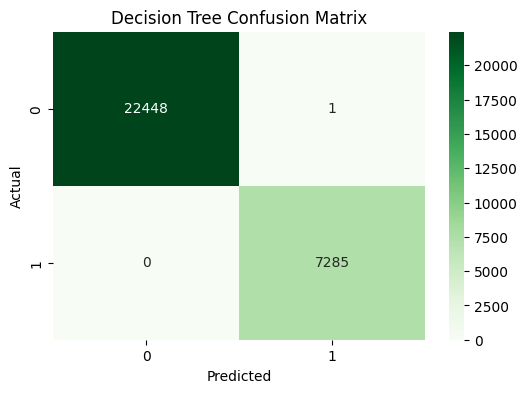

In [ ]:
DT_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(DT_confusion, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



> The results of feature selection have **HIGHER** accuracy results when compared to models that use all features.


> **Model w/o Feature Selection = 0.9998991054012242**


> **Model w/ Feature Selection = 0.9999663684670748**









# **RESULT**


> BEST MODEL = **Decision Tree**


> BEST FEATURES = **(['rate_of_interest', 'interest_rate_spread', 'upfront_charges',
       'neg_ammortization', 'credit_type', 'age', 'submission_of_application',
       'LTV', 'region', 'security_type'],
      dtype='object')**



> BEST PARAMETER = **{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}**



